<a href="https://colab.research.google.com/github/nhwzaan/multimedia_computing/blob/main/20520855_BT3_RLE_RLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thông tin sinh viên:**
- Họ và tên: Nguyễn Thị Như Vân
- MSSV: 20520855
- Ngày thực hiện: 20/03/2023

# **Import thư viện**

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
import math
import os
import time

In [ ]:
pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import librosa
import soundfile as sf

# **Bài tập 1**



## Load ảnh mức xám

In [ ]:
! wget "https://i1-giaitri.vnecdn.net/2017/11/12/lee-sung-kyung-1.jpg?w=1200&h=0&q=100&dpr=1&fit=crop&s=kngh29WsMQXJPb0ATK4Cyg"

--2023-03-21 15:56:24--  https://i1-giaitri.vnecdn.net/2017/11/12/lee-sung-kyung-1.jpg?w=1200&h=0&q=100&dpr=1&fit=crop&s=kngh29WsMQXJPb0ATK4Cyg
Resolving i1-giaitri.vnecdn.net (i1-giaitri.vnecdn.net)... 111.65.251.12
Connecting to i1-giaitri.vnecdn.net (i1-giaitri.vnecdn.net)|111.65.251.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407699 (398K) [image/jpeg]
Saving to: ‘lee-sung-kyung-1.jpg?w=1200&h=0&q=100&dpr=1&fit=crop&s=kngh29WsMQXJPb0ATK4Cyg.2’

lee-sung-kyung-1.jp 100%[===================>] 398.14K   523KB/s    in 0.8s    

2023-03-21 15:56:26 (523 KB/s) - ‘lee-sung-kyung-1.jpg?w=1200&h=0&q=100&dpr=1&fit=crop&s=kngh29WsMQXJPb0ATK4Cyg.2’ saved [407699/407699]



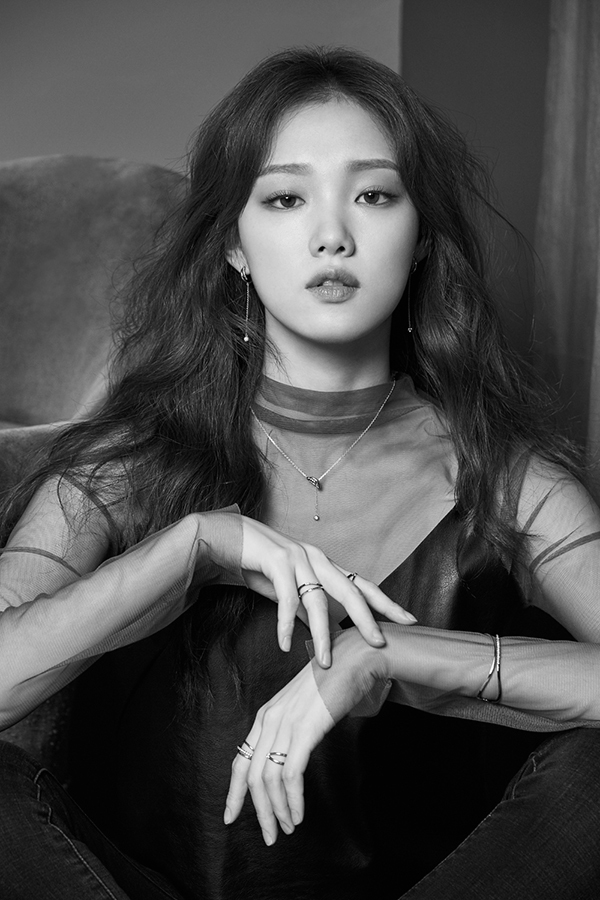

In [ ]:
img = cv.imread("/content/lee-sung-kyung-1.jpg?w=1200&h=0&q=100&dpr=1&fit=crop&s=kngh29WsMQXJPb0ATK4Cyg", cv.IMREAD_GRAYSCALE)
cv2_imshow(img)

## Chuyển về dạng mảng

In [ ]:
img.flatten()

array([74, 72, 72, ..., 16, 18, 15], dtype=uint8)

## Encoding Image RLE

In [ ]:
def RLE_encoding(img):

  fimg = img.flatten()
  encoded = {'shape': img.shape,
             'encoded': []}
  prev = None
  count = 0

  for pixel_val in fimg:
    if prev is None:
      prev = pixel_val
      count = 1
    elif prev == pixel_val:
      count += 1
    else:
      encoded['encoded'].append([prev, count])
      prev = pixel_val
      count = 1
  encoded['encoded'].append([prev, count])

  return encoded

In [ ]:
encoded_img = RLE_encoding(img)

## Decoding Image RLD

In [ ]:
def RLD_decoding(encoded):
  decoded = [encoded['encoded'][0][0]] * encoded['encoded'][0][1]
  for pixels in encoded['encoded'][1:]:
    decoded += [pixels[0]]*pixels[1]

  decoded = np.array(decoded, dtype=np.uint8)
  decoded = decoded.reshape(encoded['shape'])
  return decoded

In [ ]:
decoded_img = RLD_decoding(encoded_img)

## Test on img data

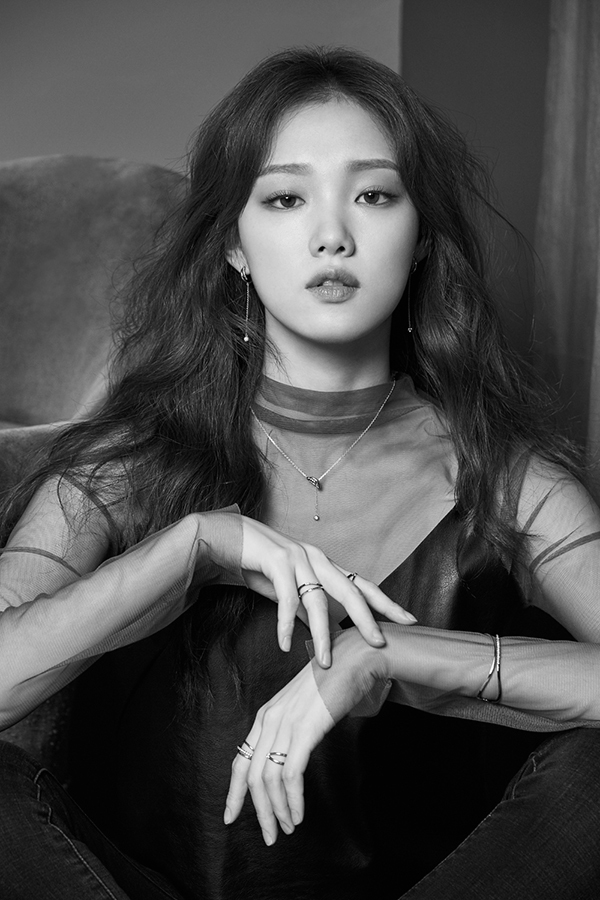

In [ ]:
cv2_imshow(decoded_img)












## Tỉ số nén

In [ ]:
print("Tỉ số nén:", (len(encoding_img[1][1]) * 2) / (img.shape[0] * img.shape[1]))

Tỉ số nén: 0.9607609878455892


# **Bài tập 2**

## Dữ liệu văn bản


### Text RLE

In [ ]:
def rle_encode(message):
    encoded_string = ""

    print("Run Length Codes")
    print("---------------------------------")
    print("Alphabet", end = "\t")
    print("Frequency")

    i = 0
    while (i <= len(message)-1):
        count = 1
        ch = message[i]
        j = i
        while (j < len(message)-1):
            if (message[j] == message[j + 1]):
                count = count + 1
                j = j + 1
            else:
                break
        print(ch, end = "\t\t")
        print(str(count))
        encoded_string = encoded_string + str(count) + ch
        i = j + 1

    beforeCompression = len(message) * 8
    afterCompression = len(encoded_string) * 8

    print("\nSpace usage before compression (in bits):", beforeCompression, " bits")
    print("Space usage after compression (in bits):",  afterCompression, " bits")
    print('Compression ratio: ', round(beforeCompression / afterCompression, 2), '\n')

    return encoded_string

### Text RLD

In [ ]:
def rle_decode(decompressor):
    final_str = []
    final_strg = ''
    final_rle = decompressor
    char, freq = [], []

    for id in range(len(final_rle)):
        if id % 2 == 0:
            freq.append(final_rle[id])
        else:
            char.append(final_rle[id])

    if len(char) == len(freq):
        for i in range(len(char)):
            final_str.append([freq[i], char[i]])

    for i in range(len(final_str)):
        for j in range(int(final_str[i][0])):
            final_strg = final_strg + str(final_str[i][1])
    return final_strg

### Test on text data


In [ ]:
start_time = time.time()
string = "AuuBBBCCCCCCcccccCCCCCCCCCA"
a = rle_encode(string)
print("Original string: ", string)
print("Run Length Encoding: ", a, '\n')
print("Decoded string: ", rle_decode(a))
print("Run time: %s seconds" % (time.time() - start_time))

Run Length Codes
---------------------------------
Alphabet	Frequency
A		1
u		2
B		3
C		6
c		5
C		9
A		1

Space usage before compression (in bits): 216  bits
Space usage after compression (in bits): 112  bits
Compression ratio:  1.93 

Original string:  AuuBBBCCCCCCcccccCCCCCCCCCA
Run Length Encoding:  1A2u3B6C5c9C1A 

Decoded string:  AuuBBBCCCCCCcccccCCCCCCCCCA
Run time: 0.007586002349853516 seconds


### Tỉ số nén

In [ ]:
print("Tỉ số nén:", len(a)/len(string))

Tỉ số nén: 0.5185185185185185


## Dữ liệu âm thanh

In [ ]:
! pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Load audio

In [ ]:
! wget 'https://github.com/trivm12/test/raw/main/Mondstadt%20at%20Night%20-%20Genshin%20Impact%20(Piano%20cover%20-%20Pianuki).mp3'

--2023-03-21 15:56:34--  https://github.com/trivm12/test/raw/main/Mondstadt%20at%20Night%20-%20Genshin%20Impact%20(Piano%20cover%20-%20Pianuki).mp3
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/trivm12/test/main/Mondstadt%20at%20Night%20-%20Genshin%20Impact%20(Piano%20cover%20-%20Pianuki).mp3 [following]
--2023-03-21 15:56:34--  https://raw.githubusercontent.com/trivm12/test/main/Mondstadt%20at%20Night%20-%20Genshin%20Impact%20(Piano%20cover%20-%20Pianuki).mp3
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 828021 (809K) [audio/mpeg]
Saving to: ‘Mondstadt at Night - Genshin Impact (Piano cover

In [ ]:
! mv "/content/Mondstadt at Night - Genshin Impact (Piano cover - Pianuki).mp3" "/content/Genshin_Impact.mp3"

### Speech RLE

In [ ]:
def RLE_audio(filePath):
  import librosa

  y, sr = librosa.load(filePath)
  tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
  print('Estimated tempo: {:.2f} beats per minute'.format(tempo))
  beat_times = librosa.frames_to_time(beat_frames, sr=sr)
  encoded = [sr, []]

  y = y.round(3)
  prev = None
  for freq in y:
    if prev is None:
      prev = freq
      count = 1
    elif prev == freq:
      count += 1
    else:
      encoded[1] += [prev, count]
      prev = freq
      count = 1
  encoded[1] += [prev, count]

  return encoded

### Speech RLD

In [ ]:
def RLD_audio(encoded):
  # STRUCTURE OF ENCODED
  #   encoded = [
  #                 sampling rate,
  #                 [freq, count, freq, count, freq, count,...]
  #             ]

  decoded = []
  for index in range(0, len(encoded[1]), 2):
    decoded += [encoded[1][index]]*encoded[1][index + 1]

  decoded = np.array(decoded, dtype=np.float32)
  sr = encoded[0]
  return sr, decoded

### Test on speech data

In [ ]:
# /content/Genshin_Impact.mp3

In [ ]:
audio_RLE = RLE_audio('/content/Genshin_Impact.mp3')

Estimated tempo: 117.45 beats per minute


In [ ]:
sr, audio_RLD = RLD_audio(audio_RLE)

In [ ]:
sf.write('/content/Genshin_Impact.wav', audio_RLD, sr)

In [ ]:
import pydub
sound = pydub.AudioSegment.from_wav("/content/Genshin_Impact.wav")
sound.export("/content/Genshin_Impact_decodeCompress.mp3", format="mp3")

<_io.BufferedRandom name='/content/Genshin_Impact_decodeCompress.mp3'>

In [ ]:
print("Genshin_Impact.mp3:",
      os.path.getsize("/content/Genshin_Impact.mp3"))
print("Genshin_Impact.wav:",
      os.path.getsize("/content/Genshin_Impact.wav"))
print("Genshin_Impact_decodeCompress.mp3:",
      os.path.getsize("/content/Genshin_Impact_decodeCompress.mp3"))

Genshin_Impact.mp3: 828021
Genshin_Impact.wav: 2279900
Genshin_Impact_decodeCompress.mp3: 207326


### Tỉ số nén

In [ ]:
y_, sr_ = librosa.load("/content/Genshin_Impact.mp3")
print("Tỉ số nén tính trên thống kê tần số âm thanh:", len(audio_RLE[1]) / len(y_))

Tỉ số nén tính trên thống kê tần số âm thanh: 0.9324781916050838
